No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


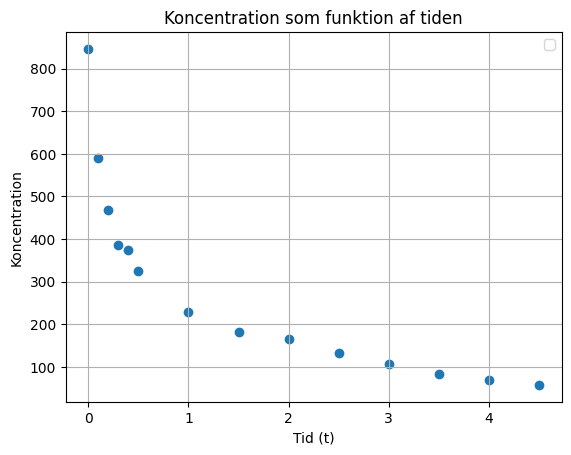

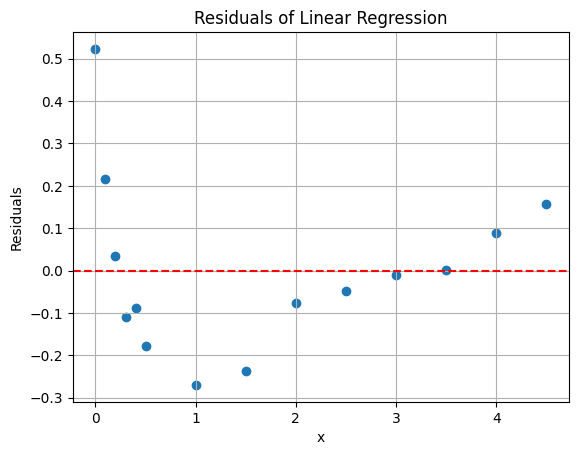

R-squared value: 0.940036661629417
-0.5143147782911154 6.217695792760447


In [98]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from sympy import *
from dtumathtools import *

init_printing()

# Define the logarithmic function
def linear_function(x, a, b):
    return a * x + b

x = np.array([i/10 for i in range(5)] + [i-0.5*i for i in range(1, 10)])
y = np.array([846, 591, 468, 385, 374, 325, 229, 183, 166, 132, 106, 83, 70, 58])

#x = np.array([i*60*60 for i in x])

y_log = np.array([N(log(i)) for i in y])

popt, pcov = curve_fit(linear_function, x, y_log)

# Extract the parameters
a, b = popt

x_curve = np.linspace(0, x[-1], 100)
y_curve = linear_function(x_curve, a, b)

#plt.plot(x_curve, y_curve, 'r', label='Linear Fit')
plt.scatter(x, y)
plt.grid(True)
plt.title("Koncentration som funktion af tiden")
plt.xlabel("Tid (t)")
plt.ylabel("Koncentration")
plt.legend()
plt.show()

# Calculate predicted y values using the linear fit
y_pred = linear_function(x, a, b)

# Calculate residuals
residuals = y_log - y_pred

# Plot residuals
plt.scatter(x, residuals)
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0 for reference
plt.grid(True)
plt.title("Residuals of Linear Regression")
plt.xlabel("x")
plt.ylabel("Residuals")
plt.show()

# Calculate total sum of squares
y_mean = np.mean(y_log)
ss_total = np.sum((y_log - y_mean) ** 2)

# Calculate sum of squares of residuals
ss_residual = np.sum((y_log - y_pred) ** 2)

# Calculate r-squared value
r_squared = 1 - (ss_residual / ss_total)

print("R-squared value:", r_squared)
print(a, b)


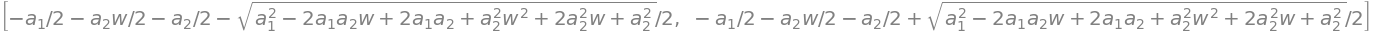

⎡⎛                                                                            
⎢⎜                      ____________________________________________________  
⎢⎜                     ╱   2                           2  2       2       2   
⎢⎜  a₁   a₂⋅w   a₂   ╲╱  a₁  - 2⋅a₁⋅a₂⋅w + 2⋅a₁⋅a₂ + a₂ ⋅w  + 2⋅a₂ ⋅w + a₂    
⎢⎜- ── - ──── - ── - ───────────────────────────────────────────────────────, 
⎢⎜  2     2     2                               2                             
⎢⎜                                                                            
⎢⎜                                                                            
⎣⎝                                                                            

   ⎡⎡                          _______________________________________________
   ⎢⎢                         ╱   2                           2  2       2    
   ⎢⎢      a₁   a₂⋅w   a₂   ╲╱  a₁  - 2⋅a₁⋅a₂⋅w + 2⋅a₁⋅a₂ + a₂ ⋅w  + 2⋅a₂ ⋅w +
   ⎢⎢    - ── - ──── - ── - ───────────────────────

⎡   ⎛                          _______________________________________________
⎢   ⎜                         ╱   2                           2  2       2    
⎢   ⎜      a₁   a₂⋅w   a₂   ╲╱  a₁  - 2⋅a₁⋅a₂⋅w + 2⋅a₁⋅a₂ + a₂ ⋅w  + 2⋅a₂ ⋅w +
⎢   ⎜    - ── - ──── - ── + ──────────────────────────────────────────────────
⎢   ⎜      2     2     2                               2                      
⎢c₁⋅⎜1 + ─────────────────────────────────────────────────────────────────────
⎢   ⎝                                       a₂⋅w                              
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                                             
⎢                                                   

In [99]:
a1, a2, w, a3, l = symbols("a1, a2, w, a3, lambda")
a = Matrix([[-(a1+a2), a2], [w*a2, -w*a2]])

display(a.charpoly())


e_vals = list(a.eigenvals().keys())
e_vecs = a.eigenvects()

display(e_vals)
display(e_vecs)

c1, c2, t = symbols("c1, c2, t")
l1, l2 = symbols("l1, l2")

generel = c1 * e_vecs[1][2][0] * exp(e_vals[1]*t) + c2 * e_vecs[0][2][0] * exp(e_vals[0]*t)
generel

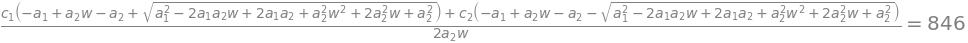

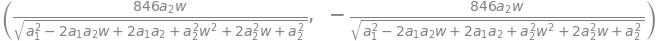

In [100]:
eq1 = simplify(Eq(846, generel[0].subs({t:0})))
eq2 = simplify(Eq(0, generel[1].subs({t:0})))
display(eq1)
display(eq2)
solve(eq1, c1)
sols = list(linsolve([eq1, eq2], [c1, c2]))[0]
c1s, c2s = sols
c1s, c2s

In [101]:
x = np.array([i/10 for i in range(5)] + [i-0.5*i for i in range(1, 10)])
y = np.array([846, 591, 468, 385, 374, 325, 229, 183, 166, 132, 106, 83, 70, 58])
cb, cv = generel.subs({c1:c1s, c2:c2s}).subs({a1: 0.89699773, a2: 3.05690702, w:1.07665091})
cb, cv

In [102]:
errors = []
for tid, koncentration in zip(x, y):
    beregnet = N(cb.subs({t:tid}))
    
    est = abs(koncentration-beregnet)**2
    errors.append(est)
    print(f"{tid}timer   |   ({koncentration} - {beregnet})**2 = {est}")

print(errors)
print(sqrt(sum(errors)))

0.0timer   |   (846 - 846.000000000000)**2 = 1.29246970711411E-26
0.1timer   |   (591 - 599.261279826430)**2 = 68.2487443705856
0.2timer   |   (468 - 467.145820575842)**2 = 0.729622488655605
0.3timer   |   (385 - 393.340336684585)**2 = 69.5612160122409
0.4timer   |   (374 - 349.335928263445)**2 = 608.316434625943
0.5timer   |   (325 - 320.693918750828)**2 = 18.5423357244711
1.0timer   |   (229 - 246.253180915027)**2 = 297.672251686650
1.5timer   |   (183 - 197.878973655121)**2 = 221.383857029795
2.0timer   |   (166 - 159.313139525524)**2 = 44.7141030051135
2.5timer   |   (132 - 128.273797728744)**2 = 13.8845833663170
3.0timer   |   (106 - 103.282258797162)**2 = 7.38611724560588
3.5timer   |   (83 - 83.1598238008883)**2 = 0.0255436473303707
4.0timer   |   (70 - 66.9578339346272)**2 = 9.25477436930572
4.5timer   |   (58 - 53.9124702449576)**2 = 16.7078994983572
[1.29246970711411e-26, 68.2487443705856, 0.729622488655605, 69.5612160122409, 608.316434625943, 18.5423357244711, 297.6722516866

In [103]:
x = np.array([i/10 for i in range(5)] + [i-0.5*i for i in range(1, 11)])


In [104]:
f1 = Function("f1")
f2 = Function("f2")

u = symbols("u")

ut = Matrix([u, 0])

f = Matrix([f1(t), f2(t)])
df = diff(f, t)
A = a.subs({a1: 0.89699773, a2: 3.05690702, w:1.07665091})
df, f, a, A, ut

⎛⎡d        ⎤                                                                  
⎜⎢──(f₁(t))⎥                                                                  
⎜⎢dt       ⎥  ⎡f₁(t)⎤  ⎡-a₁ - a₂   a₂  ⎤  ⎡  -3.95390475        3.05690702    
⎜⎢         ⎥, ⎢     ⎥, ⎢               ⎥, ⎢                                   
⎜⎢d        ⎥  ⎣f₂(t)⎦  ⎣  a₂⋅w    -a₂⋅w⎦  ⎣3.29122172486839  -3.29122172486839
⎜⎢──(f₂(t))⎥                                                                  
⎝⎣dt       ⎦                                                                  

      ⎞
      ⎟
⎤  ⎡u⎤⎟
⎥, ⎢ ⎥⎟
⎦  ⎣0⎦⎟
      ⎟
      ⎠

In [105]:
eq_system = Eq(df, A*f + ut)            # Differentialligningssystem

start_værdi = ((4.4*0.65)*1000)/5.2 # <--- ÆNDRING
print(start_værdi)

# Løs differentialligningerne
generel = list(dtutools.dsolve(eq_system, ics = {f1(0):start_værdi, f2(0):0}).values())
display(generel)

550.0000000000001


In [106]:
generel = list(dtutools.dsolve(eq_system, ics = {f1(0):start_værdi, f2(0):0}).values())
display(generel)
u_værdi = solve(Eq(generel[1].subs(t, 5), 250), u)[0]
print("u_værdi", u_værdi)

generelN = generel[0].subs(u, u_værdi), generel[1].subs(u, u_værdi)

u_værdi 222.281644708350


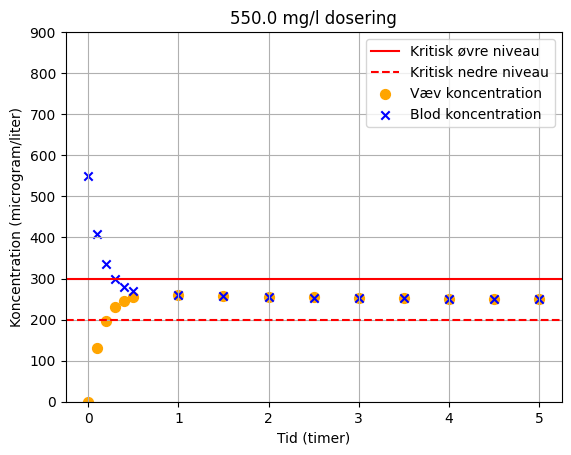

In [107]:
display(generelN)
liste_blod = []
liste_væv = []
liste_blod_ori = []
liste_væv_ori = []
for tid in x:
    liste_blod.append(N((generelN[0]).subs({t:tid})))
    liste_væv.append(N(generelN[1].subs({t:tid})))

    #liste_blod_ori.append(N((cb).subs({t:tid})))
    #liste_væv_ori.append(N((cv).subs({t:tid})))
plt.axhline(y = 300, color = 'r', label="Kritisk øvre niveau")
plt.axhline(y = 200, color = 'r', linestyle = 'dashed', label="Kritisk nedre niveau")

plt.scatter(x, liste_væv, color="orange", alpha=1, s=50, label="Væv koncentration")
plt.scatter(x, liste_blod, color="b", alpha=1, marker="x", label="Blod koncentration")
#plt.scatter(x, liste_blod_ori, alpha=0.5, color="r")
#plt.scatter(x, liste_væv_ori, alpha=0.5, color="b")

plt.grid(True)
plt.title(f"{round(start_værdi, 3)} mg/l dosering")
plt.ylim(0, 900)
plt.xlabel("Tid (timer)")
plt.ylabel("Koncentration (microgram/liter)")
plt.legend()
plt.show()
    

In [108]:
mgl = u_værdi / 60 / 60
print(f"Dosering pr. liter: {start_værdi} mg/l + {mgl} mg/l/s")
print(f"Dosering for person med 5.2 liter blod: {start_værdi * 5.2} mg + {mgl * 5.2} mg/s")

Dosering pr. liter: 550.0000000000001 mg/l + 0.0617449013078750 mg/l/s
Dosering for person med 5.2 liter blod: 2860.000000000001 mg + 0.321073486800950 mg/s


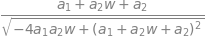

In [109]:
m = (a1+a2+w*a2) / sqrt((a1+a2+w*a2)**2 - 4*a1*a2*w)
display(m.simplify())